# Realizando a conexão com o driver

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
%cd '/gdrive/My Drive/PDFS'
%ls

/gdrive/My Drive/PDFS
'comorbidades  com doses  e data..csv'
 comorbidade.txt
 Contador_ID.txt
 controle_mensal_amostras_fora_padrao.csv
 controle_mensal_amostras_fora_padrao.zip.1
 controle_mensal_infraestrutura_operacionais.csv
'dados publicacao.csv'
 Download_arquivos_01_11_2021.txt
 Download_arquivos_28_10_2021.txt
 Download_arquivos_29_10_2021.txt
 Download_arquivos_31_10_2021.txt
 new.csv


# Importando a base de dados

In [ ]:
import zipfile
import pandas as pd
import time

# Realizando o download da base

dados = !wget --no-check-certificate https://sage.saude.gov.br/dados/sisagua/controle_mensal_infraestrutura_operacionais.zip

# Pegando os CSV's que se encontravam zipados

with zipfile.ZipFile('controle_mensal_infraestrutura_operacionais.zip',"r") as zip_ref:
    zip_ref.extractall("Sisagua")

time.sleep(20)

%cd 'Sisagua'
%ls

# Lendo o Dataframe

df = pd.read_csv('controle_mensal_infraestrutura_operacionais.csv', encoding='latin_1',sep=';',decimal=',',
                 dtype={'Código IBGE':'object','CNPJ da Instituição':'object',r'CNPJ do escritório regional/local':'object'})

# Visão geral do formato das colunas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518554 entries, 0 to 518553
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Região Geográfica                                      518554 non-null  object 
 1   UF                                                     518554 non-null  object 
 2   Regional de Saúde                                      518554 non-null  object 
 3   Município                                              518554 non-null  object 
 4   Código IBGE                                            518554 non-null  object 
 5   Tipo da Instituição                                    516456 non-null  object 
 6   Sigla da Instituição                                   279955 non-null  object 
 7   Nome da Instituição                                    516456 non-null  object 
 8   CNPJ da Instituição               

# Contagem de valores nulos

In [ ]:
df.isnull().astype(int).sum()

Região Geográfica                                             0
UF                                                            0
Regional de Saúde                                             0
Município                                                     0
Código IBGE                                                   0
Tipo da Instituição                                        2098
Sigla da Instituição                                     238599
Nome da Instituição                                        2098
CNPJ da Instituição                                        2098
Nome do escritório regional/local                        238599
CNPJ do escritório regional/local                        238599
Tipo da Forma de Abastecimento                                0
Código Forma de abastecimento                                 0
Nome da Forma de Abastecimento                                0
Ano de referência                                             0
Mês de referência                       

# Conferindo se existem 27 UF's

In [ ]:
df['UF'].value_counts()

MG    130080
SP    129538
SC     72309
MT     39056
PR     36774
BA     24973
RS     21095
TO     12072
GO     12027
MS     11642
RJ      9333
ES      8201
MA      3774
AM      3572
RO      1063
PB      1045
PA       578
CE       497
PI       416
RN       213
AL       155
RR        64
PE        29
SE        21
AP        19
DF         7
AC         1
Name: UF, dtype: int64

# Conferindo se as 5 regiões estão corretas

In [ ]:
df['Região Geográfica'].value_counts()

SUDESTE         277152
SUL             130178
CENTRO-OESTE     62732
NORDESTE         31123
NORTE            17369
Name: Região Geográfica, dtype: int64

# Conferindo se o Código IBGE está indexado corretamente

In [ ]:
(df.drop_duplicates(subset ="Código IBGE", keep = 'last')['Código IBGE']).to_csv('new.csv', index=False)

Existem 5 códigos IBGE que não tiveram correspondência com a base disponibilizada pelo Ministério da saúde, sendo estes:

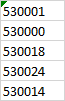

Conferindo quais municipios são referentes os códigos do IBGE

In [ ]:
df[df['Código IBGE']=='530014'].head(1)

,Região Geográfica,UF,Regional de Saúde,Município,Código IBGE,Tipo da Instituição,Sigla da Instituição,Nome da Instituição,CNPJ da Instituição,Nome do escritório regional/local,CNPJ do escritório regional/local,Tipo da Forma de Abastecimento,Código Forma de abastecimento,Nome da Forma de Abastecimento,Ano de referência,Mês de referência,Data de registro,Data de preenchimento do relatório mensal,Zona,Categoria Área,Área,Tipo do local,Local,Número de reparos na rede (somente para SAA),Número de eventos de intermitência (somente para SAA),Número de eventos de falta de água,Número de reclamações de cor da água,Número de Reclamação de gosto e ou odor
279266,CENTRO-OESTE,DF,UNICA,SANTA MARIA,530014,Regional,CAESB,COMPANHIA DE SANEAMENTO AMBIENTAL DO DISTRITO ...,82024000137,CAESB REGIONAL UNICA,82024000137,SAA,S530014000002,CHAPÉU DE PEDRA,2018,9,2019/08/15 00:00:00.000,2019/08/15 00:00:00.000,Urbana,Bairro,SETOR HABITACIONAL TORORO,NaN,NaN,0.0,0.0,0.0,1.0,0.0


# Tipos de instituições presentes na base

In [ ]:
df['Tipo da Instituição'].value_counts()

Regional    279955
Local       236501
Name: Tipo da Instituição, dtype: int64

# Siglas das 52 instituições presentes no banco com suas respectivas frequências

Algumas siglas se encontram cortadas ou com presença de espaçamentos na sua escrita

In [ ]:
pd.options.display.max_rows=1000

In [ ]:
df['Sigla da Instituição'].value_counts()

COPASA        100884
CASAN          43781
SANEPAR        31340
EMBASA         24461
SABESP         14721
SANEATINS      10865
CORSAN         10707
SANESUL         9705
SANEAGO         9512
COPANOR         5925
CESAN           4123
SIMAE           3570
CAEMA           2324
AGJ             2052
COSAMA          2001
ATS             1047
CAERD            907
PROLAGOS         464
CEDAE            382
CAERN            196
BRK AMBIEN       145
FV               142
LICS R           119
INTERVIAS         78
AGESPISA          64
CAER              64
KF                42
SPMAR             33
ARTIBRAS          30
EB CDRM           27
LIGIANE A         23
AB COLINAS        23
CART              22
IAPAR             21
H2O               21
DESO              21
PRECISAO T        18
SOFT SUL P        17
HIDROS            13
SIMAE2            10
COMPESA            9
LABORPLAN          7
CAESB              7
CAESA              6
JOSIANE VI         6
SISAR              5
COSANPA            5
CAGECE       

# Conferindo se existe nomes de instituições preenchidos como número

In [ ]:
instituicao = list((df.drop_duplicates(subset ="Nome da Instituição", keep = 'last')['Nome da Instituição']))

In [ ]:
import collections

frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = instituicao[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({False: 2873})


# Conferindo se possui string na variavel CNPJ

In [ ]:
CNPJ = list((df.drop_duplicates(subset ="CNPJ da Instituição", keep = 'last')['CNPJ da Instituição']))

In [ ]:
frequencia = []

for i in range(0,len(CNPJ)):
  try:
    result = isinstance(CNPJ[i], str)
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 3114, False: 1})


# Analisando o tamanho dos CNPJ's

In [ ]:
frequencia = []

for i in range(0,len(CNPJ)):
  try:
    result = sum(len(i) for i in CNPJ[i])
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({14: 2012, 13: 995, 12: 91, 11: 14, 10: 1, 9: 1})


# Conferindo se o nome da instituição regional / local esta preenchido como string

In [ ]:
instituicao = list((df.drop_duplicates(subset ="Nome do escritório regional/local", keep = 'last')['Nome do escritório regional/local']))

In [ ]:
import collections

frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = instituicao[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({False: 457})


# Conferindo se possui valores textuais na variavel CNPJ do escritório regional/local

In [ ]:
CNPJ = list((df.drop_duplicates(subset ="CNPJ do escritório regional/local", keep = 'last')['CNPJ do escritório regional/local']))

In [ ]:
frequencia = []

for i in range(0,len(CNPJ)):
  try:
    result = isinstance(CNPJ[i], str)
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 333, False: 1})


# Conferindo a frequência de caracteres na variável CNPJ do escritório regional/local

In [ ]:
instituicao = list((df.drop_duplicates(subset ="CNPJ do escritório regional/local", keep = 'last')['CNPJ do escritório regional/local']))

In [ ]:
frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = sum(len(i) for i in instituicao[i])
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({14: 283, 13: 47, 12: 2, 11: 1})


# Tipo da forma de abastecimento

In [ ]:
df['Tipo da Forma de Abastecimento'].value_counts()

SAA    454881
SAC     63673
Name: Tipo da Forma de Abastecimento, dtype: int64

# Conferindo se tem nome preenchido apenas com números

In [ ]:
instituicao = list((df.drop_duplicates(subset ="Nome da Forma de Abastecimento", keep = 'last')['Nome da Forma de Abastecimento']))

In [ ]:
import collections

frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = instituicao[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({False: 10905, True: 6})


# Averiguando a qualidade do Código Forma de abastecimento

In [ ]:
codigo = list((df.drop_duplicates(subset ="Código Forma de abastecimento", keep = 'last')['Código Forma de abastecimento']))

In [ ]:
import collections

frequencia = []

for i in range(0,len(codigo)):
  try:
    result = codigo[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({False: 10076})


# Ano de referência

In [ ]:
df['Ano de referência'].value_counts()

2020    93970
2019    87614
2018    77097
2021    73511
2017    72748
2016    52344
2015    39855
2014    21415
Name: Ano de referência, dtype: int64

# Mês de referência

In [ ]:
df['Mês de referência'].value_counts()

9     45584
8     45170
10    44584
1     44573
5     44563
4     44405
7     44388
6     44342
2     43899
3     43610
11    36926
12    36510
Name: Mês de referência, dtype: int64

# Data de registro

In [ ]:
from collections import Counter

# Separando os anos 

Ano = []

for i in range(0,len(df['Data de registro '])):
  Ano.append(df['Data de registro '][i][0:4])

# Separando os meses

print(50 * '--')

print(" Ano ")

print(50 * '--')

print(Counter(Ano))


mes = []

for i in range(0,len(df['Data de registro '])):
  mes.append(df['Data de registro '][i][5:7])


print(50 * '--')

print(" Mes ")

print(50 * '--')

print(Counter(mes))


# Separando os dias

dia = []

for i in range(0,len(df['Data de registro '])):
  dia.append(df['Data de registro '][i][8:10])


print(50 * '--')

print(" Dia ")

print(50 * '--')

print(Counter(dia))

----------------------------------------------------------------------------------------------------
 Ano 
----------------------------------------------------------------------------------------------------
Counter({'2020': 93318, '2019': 87003, '2021': 84679, '2018': 77323, '2017': 72694, '2016': 53104, '2015': 42438, '2014': 7995})
----------------------------------------------------------------------------------------------------
 Mes 
----------------------------------------------------------------------------------------------------
Counter({'08': 49222, '11': 48746, '10': 45638, '09': 45468, '07': 44579, '05': 43871, '03': 42311, '06': 41711, '12': 40630, '01': 40135, '04': 39113, '02': 37130})
----------------------------------------------------------------------------------------------------
 Dia 
----------------------------------------------------------------------------------------------------
Counter({'10': 31788, '09': 24907, '14': 23789, '13': 22735, '08': 22604, '11': 2

# Data de preenchimento do relatório mensal

In [ ]:
from collections import Counter

DT_registro = []

for i in range(0,len(df['Data de preenchimento do relatório mensal'])):

  if len(str(df['Data de preenchimento do relatório mensal'][i])) > 5:

    DT_registro.append(df['Data de preenchimento do relatório mensal'][i][0:10])

# Separando os anos 

Ano = []

for i in range(0,len(df['Data de preenchimento do relatório mensal'])):
  if len(str(df['Data de preenchimento do relatório mensal'][i])) > 5:
    Ano.append(df['Data de preenchimento do relatório mensal'][i][0:4])

# Separando os meses

print(50 * '--')

print(" Ano ")

print(50 * '--')

print(Counter(Ano))


mes = []

for i in range(0,len(df['Data de preenchimento do relatório mensal'])):
  if len(str(df['Data de preenchimento do relatório mensal'][i])) > 5:
    mes.append(df['Data de preenchimento do relatório mensal'][i][5:7])


print(50 * '--')

print(" Mes ")

print(50 * '--')

print(Counter(mes))


# Separando os dias

dia = []

for i in range(0,len(df['Data de preenchimento do relatório mensal'])):
  if len(str(df['Data de preenchimento do relatório mensal'][i])) > 5:
    dia.append(df['Data de preenchimento do relatório mensal'][i][8:10])


print(50 * '--')

print(" Dia ")

print(50 * '--')

print(Counter(dia))

----------------------------------------------------------------------------------------------------
 Ano 
----------------------------------------------------------------------------------------------------
Counter({'2020': 93791, '2019': 87368, '2021': 80602, '2018': 75806, '2017': 72679, '2016': 51792, '2015': 38274, '2014': 18211})
----------------------------------------------------------------------------------------------------
 Mes 
----------------------------------------------------------------------------------------------------
Counter({'08': 47311, '10': 45690, '09': 45676, '05': 45015, '11': 44778, '07': 44206, '06': 43478, '03': 43276, '04': 41840, '02': 40898, '12': 38742, '01': 37613})
----------------------------------------------------------------------------------------------------
 Dia 
----------------------------------------------------------------------------------------------------
Counter({'10': 41447, '01': 32309, '09': 29720, '08': 26919, '11': 24950, '07': 

# Zona

In [ ]:
df['Zona'].value_counts()

Urbana    476394
Rural      42160
Name: Zona, dtype: int64

# Categoria Área

In [ ]:
df['Categoria Área'].value_counts()

Bairro                        434551
Povoado/Lugarejo               29719
Sede de distrito (ou vila)     27613
Área urbana isolada            14230
Núcleo/Propriedade Rural       11054
Comunidade Quilombola            687
Projeto de assentamento          498
Reserva Extrativista              87
Comunidade Ribeirinha             74
Aldeia indígena                   41
Name: Categoria Área, dtype: int64

# Área

In [ ]:
df['Área'].value_counts()

CENTRO                          83946
SEDE MUNICIPAL                  16245
SETOR CENTRAL                    3506
BELA VISTA                       2902
SEDE DO MUNICIPIO                2017
                                ...  
FRANCISCO VIEIRA CAMPOS             1
AGESPISA DE MIGUEL ALVES            1
BRASILINA TERRA JOIA POLETTO        1
RESIDENCIAL MÁRIO COVAS             1
RIBEIRAO VERDE                      1
Name: Área, Length: 14556, dtype: int64

Conferindo se tem área preenchida apenas com números 

In [ ]:
area = list((df.drop_duplicates(subset ="Área", keep = 'last')['Área']))

In [ ]:
import collections

frequencia = []

for i in range(0,len(area)):
  try:
    result = area[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({False: 14554, True: 2})


# Tipo do local

In [ ]:
df['Tipo do local'].value_counts()

Indústria                    10812
Outro                         7439
Estabelecimento comercial     6532
Condomínio                    3227
Estabelecimento de ensino     2020
Grupo de casas                1898
Casa                          1891
Linha                         1462
Estabelecimento de saúde      1384
Clube                         1227
Conjunto habitacional          642
Edifício/Prédio                595
Posto de combustível           426
Asilo/Casa de repouso          247
Templo religioso               140
Praça                          136
Cadeia/Presídio                123
Creche                          71
Estádio/Ginásio                 71
Porto                           33
Parque                          22
Aeroporto                       20
Acampamento                     13
Construção civil (obra)         10
Rodoviária                       8
Cemitério                        4
Orfanato                         4
Estação Ferroviária              1
Name: Tipo do local,

# Local

In [ ]:
df['Local'].value_counts()

CNH LATIN AMERICA LTDA                 304
COPASA                                 301
CENTRO                                 270
ANOVIS INDUSTRIAL FARMACEUTICA LTDA    211
SOROCABA AMBIENTAL FILIAL              170
                                      ... 
EMEF VISCONDE DO RIO BRANCO              1
CAVALETE DO ESF LARANJEIRAS              1
CASA 1 PONTO 21                          1
RESIDENCIA DE LIDIA BICIGO               1
CAMPINHA                                 1
Name: Local, Length: 3484, dtype: int64

Conferindo se tem local preenchido apenas com números

In [ ]:
local = list((df.drop_duplicates(subset ="Local", keep = 'last')['Local']))

In [ ]:
import collections

frequencia = []

for i in range(0,len(local)):
  try:
    result = local[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({False: 3479, True: 5})


# Número de reparos na rede (somente para SAA)

In [ ]:
Resultado = [x for x in list((df.drop_duplicates(subset ="Número de reparos na rede (somente para SAA)", keep = 'last')['Número de reparos na rede (somente para SAA)'])) if str(x) != 'nan']

In [ ]:
import collections

frequencia = []

for i in range(0,len(Resultado)):
  try:
    result = str(Resultado[i]).replace('.','').replace('-','').replace(',','').isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 695})


# Número de eventos de intermitência (somente para SAA)

In [ ]:
Resultado = [x for x in list((df.drop_duplicates(subset ="Número de eventos de intermitência (somente para SAA)", keep = 'last')['Número de eventos de intermitência (somente para SAA)'])) if str(x) != 'nan']

In [ ]:
import collections

frequencia = []

for i in range(0,len(Resultado)):
  try:
    result = str(Resultado[i]).replace('.','').replace('-','').replace(',','').isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 1242})


# Número de eventos de falta de água

In [ ]:
Resultado = [x for x in list((df.drop_duplicates(subset ="Número de eventos de falta de água", keep = 'last')['Número de eventos de falta de água'])) if str(x) != 'nan']

In [ ]:
import collections

frequencia = []

for i in range(0,len(Resultado)):
  try:
    result = str(Resultado[i]).replace('.','').replace('-','').replace(',','').isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 1096})


# Número de reclamações de cor da água

In [ ]:
Resultado = [x for x in list((df.drop_duplicates(subset ="Número de reclamações de cor da água", keep = 'last')['Número de reclamações de cor da água'])) if str(x) != 'nan']

In [ ]:
import collections

frequencia = []

for i in range(0,len(Resultado)):
  try:
    result = str(Resultado[i]).replace('.','').replace('-','').replace(',','').isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 215})


# Número de Reclamação de gosto e ou odor

In [ ]:
Resultado = [x for x in list((df.drop_duplicates(subset ="Número de Reclamação de gosto e ou odor", keep = 'last')['Número de Reclamação de gosto e ou odor'])) if str(x) != 'nan']

In [ ]:
import collections

frequencia = []

for i in range(0,len(Resultado)):
  try:
    result = str(Resultado[i]).replace('.','').replace('-','').replace(',','').isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 99})


# Realizando a busca pela chave primária

In [ ]:
(df.groupby(['Código Forma de abastecimento', 'Município','Mês de referência','Área','Tipo do local', 'Zona','Categoria Área','Nome da Forma de Abastecimento']).size()).value_counts()

1     10492
2      3810
3      2136
4      1700
5      1520
6       177
7        21
8        13
10       11
9         4
11        2
15        1
14        1
12        1
16        1
dtype: int64